In [3]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from sklearn.metrics import classification_report

# Upload file

In [ ]:
from google.colab import files
files.upload()  # Ini akan memungkinkan Anda untuk mengunggah file 'kaggle.json'


In [5]:
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [6]:
!kaggle datasets download -d denizkavi1/brain-tumor


Dataset URL: https://www.kaggle.com/datasets/denizkavi1/brain-tumor
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 696M/700M [00:13<00:00, 70.8MB/s]
100% 700M/700M [00:13<00:00, 52.9MB/s]


# Unzip File

In [7]:
import zipfile

# Tentukan path ke file zip yang sudah diunduh
zip_path = '/content/brain-tumor.zip'  # Ganti dengan nama file ZIP yang sesuai
extract_path = '/content/brain_tumor/'

# Ekstrak file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("File berhasil diekstrak!")


File berhasil diekstrak!


# Pembentukan kelas Tumor
1 = Meningioma
2 = Glioma
3 = Pituitart Tumor

In [8]:
data_dir = '/content/brain_tumor'
class_names = os.listdir(data_dir)
num_class = len(class_names)
image_files = [[os.path.join(data_dir, class_name, x)
               for x in os.listdir(os.path.join(data_dir, class_name))]
               for class_name in class_names]

In [9]:
N=['1','2','3']
Name=[ 'meningioma','glioma','pituitary tumor' ]
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

In [10]:
image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)

# Cleaning

In [17]:
import os
from PIL import Image

# Direktori data
data_dir = '/content/brain_tumor'
class_names = os.listdir(data_dir)

# Membuat list file gambar
image_files = [[os.path.join(data_dir, class_name, x)
               for x in os.listdir(os.path.join(data_dir, class_name))]
               for class_name in class_names]

# Membuat daftar file gambar
image_file_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])

# Data Cleaning: Menghapus gambar yang rusak
broken_images = []
for file_path in image_file_list:
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verifikasi apakah gambar valid
    except (IOError, SyntaxError) as e:
        broken_images.append(file_path)

# Menampilkan gambar yang rusak
print(f"Total broken images: {len(broken_images)}")
print("Broken images:", broken_images)

# Menghapus gambar rusak
for broken_image in broken_images:
    os.remove(broken_image)
    print(f"Deleted broken image: {broken_image}")


Total broken images: 0
Broken images: []


# EDA

In [11]:
if image_file_list:  # Check if the list is not empty
    image_width, image_height = Image.open(image_file_list[0]).size

    print('Total image count:', num_total)
    print("Image dimensions:", image_width, "x", image_height)
    print("Label names:", class_names)
    print("Label counts:", [len(image_files[i]) for i in range(num_class)])
else:
    print("No image files found in the specified directory.")

Total image count: 3064
Image dimensions: 512 x 512
Label names: ['3', '2', '1']
Label counts: [930, 1426, 708]


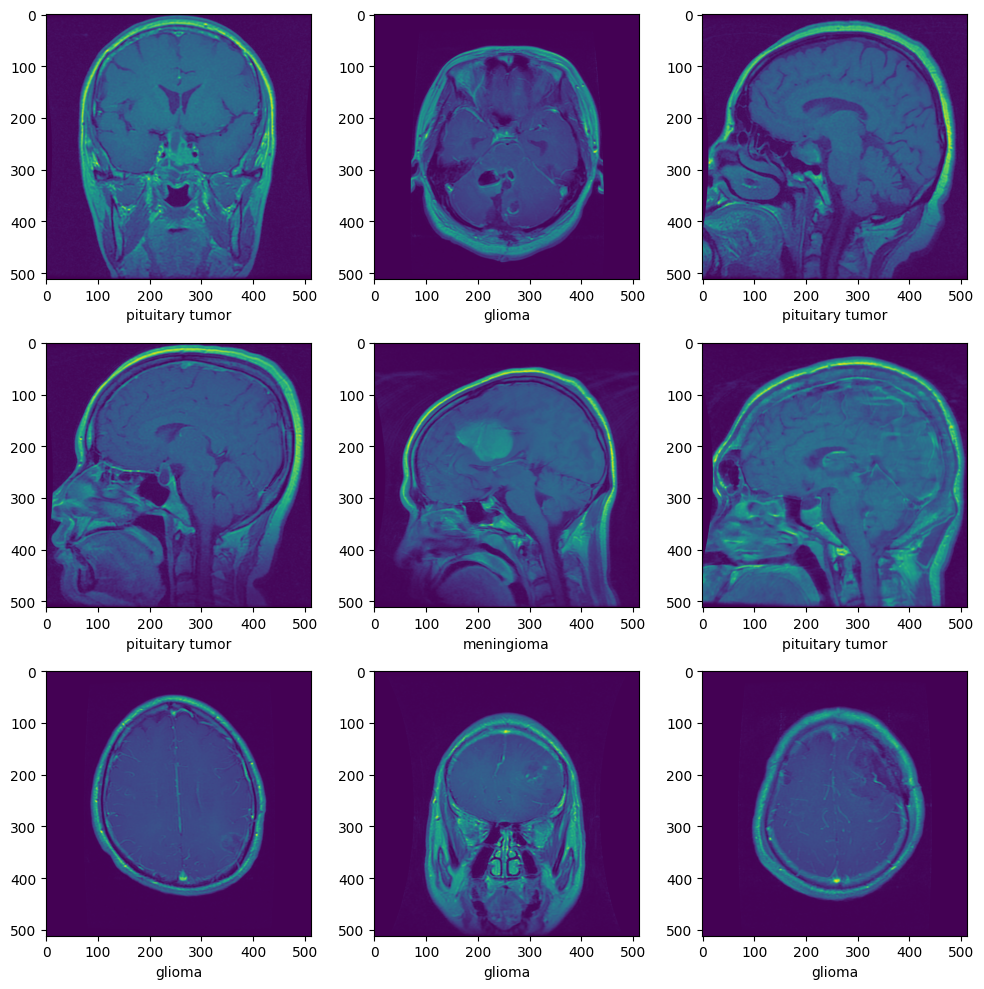

In [12]:
plt.subplots(3,3, figsize=(10,10))
for i,k in enumerate(np.random.randint(num_total, size=9)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    plt.subplot(3,3, i+1)
    plt.xlabel(reverse_mapping[class_names[image_label_list[k]]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

# Distribusi Kelas

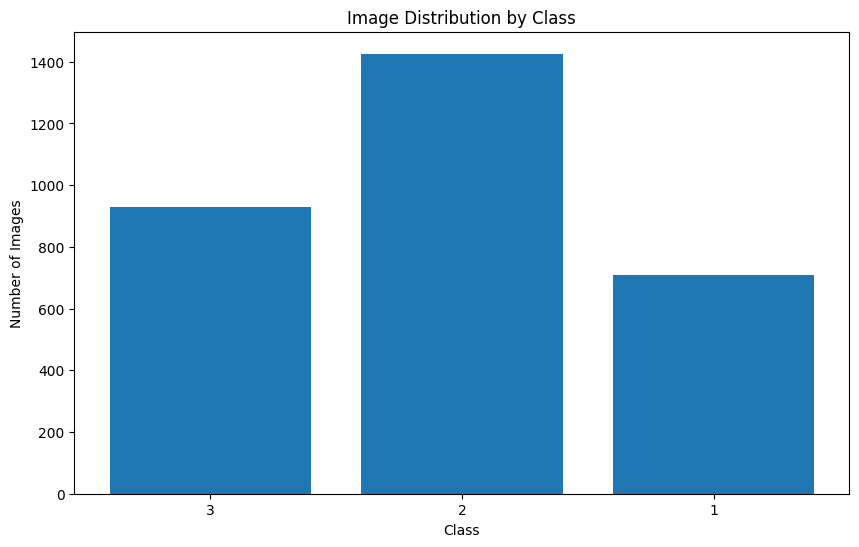

Images have different dimensions.
Unique dimensions: {(512, 512), (256, 256)}


In [14]:
# Direktori data
data_dir = '/content/brain_tumor'
class_names = os.listdir(data_dir)

# Membuat list file gambar
image_files = [[os.path.join(data_dir, class_name, x)
               for x in os.listdir(os.path.join(data_dir, class_name))]
               for class_name in class_names]

# Membuat daftar file gambar
image_file_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])

# Eksplorasi Data: Distribusi jumlah gambar tiap kelas
class_counts = [len(os.listdir(os.path.join(data_dir, class_name))) for class_name in class_names]

# Plot distribusi kelas
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Image Distribution by Class')
plt.show()

# Memeriksa dimensi gambar untuk konsistensi
image_sizes = []
for file_path in image_file_list:
    with Image.open(file_path) as img:
        image_sizes.append(img.size)

# Mengecek jika semua gambar memiliki ukuran yang sama
unique_sizes = set(image_sizes)
if len(unique_sizes) == 1:
    print(f"All images have the same dimensions: {unique_sizes.pop()}")
else:
    print("Images have different dimensions.")
    print("Unique dimensions:", unique_sizes)

Data dari masing-masing katgeori

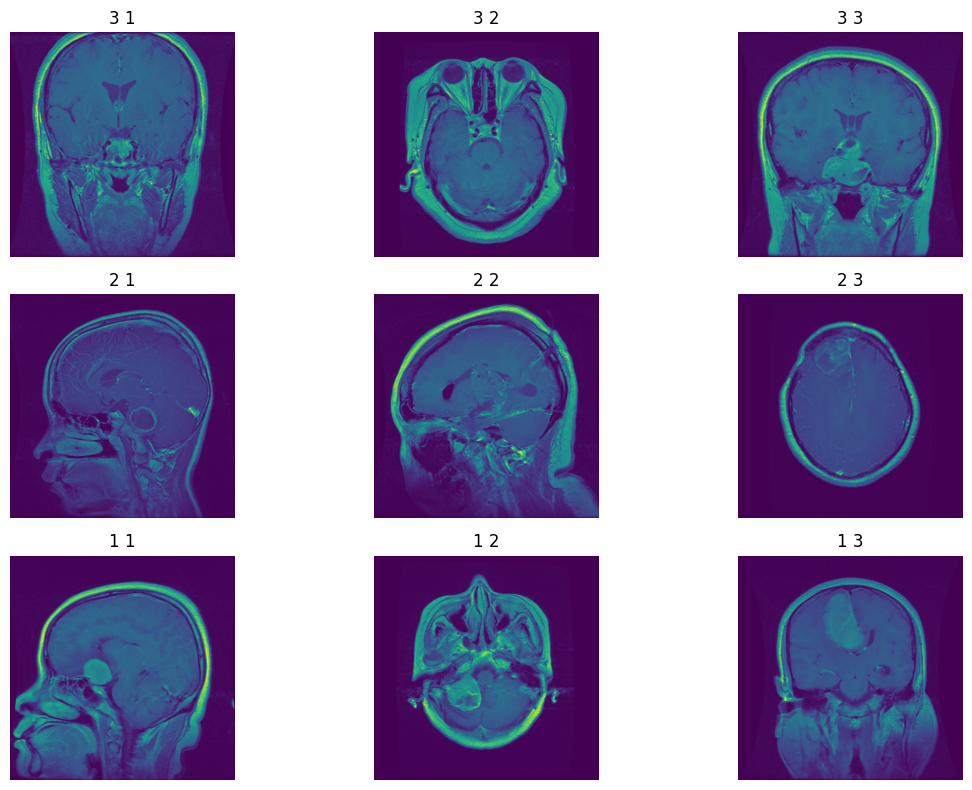

In [16]:
import random
from PIL import Image

# Direktori data
data_dir = '/content/brain_tumor'
class_names = os.listdir(data_dir)

# Membuat list file gambar
image_files = [[os.path.join(data_dir, class_name, x)
               for x in os.listdir(os.path.join(data_dir, class_name))]
               for class_name in class_names]

# Menampilkan beberapa gambar sampel dari setiap kelas
num_samples = 3  # Jumlah sampel gambar yang ingin ditampilkan per kelas
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(class_names):
    # Ambil gambar acak dari kelas
    sample_images = random.sample(image_files[i], num_samples)

    for j, image_path in enumerate(sample_images):
        # Membaca gambar dan menampilkan dalam grid
        img = Image.open(image_path)
        plt.subplot(len(class_names), num_samples, i * num_samples + j + 1)
        plt.imshow(img)
        plt.axis('off')  # Menyembunyikan axis
        plt.title(f"{class_name} {j+1}")

plt.tight_layout()
plt.show()


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    InputLayer,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau


In [28]:
DIR_DATA = "./brain-tumor/"
SIZE_IMAGE = (150, 150)

img_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode="nearest",
    validation_split=0.2,
)


In [29]:
train_data = img_generator.flow_from_directory(
    DIR_DATA,
    target_size=SIZE_IMAGE,
    batch_size=16,
    class_mode="categorical",
    subset="training",
    seed=42,
)

test_data = img_generator.flow_from_directory(
    DIR_DATA,
    target_size=SIZE_IMAGE,
    batch_size=16,
    class_mode="categorical",
    subset="validation",
    seed=42,
)


Found 2452 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [31]:
model = Sequential(
    [
        Conv2D(
            32,
            (3, 3),
            activation="leaky_relu",
            input_shape=(150, 150, 3),
        ),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation="leaky_relu"),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation="leaky_relu"),
        MaxPooling2D(2, 2),
        
        Flatten(),
        Dense(128, activation="leaky_relu"),
        Dropout(0.5),
        Dense(3, activation="softmax"),
    ]
)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
class ModelCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") >= 0.9 and logs.get("val_accuracy") >= 0.9:
            print("\nAkurasi telah mencapai >= 90%!")
            self.model.stop_training = True


callbacks = ModelCallback()

reduce_lr = ReduceLROnPlateau(factor=0.1, patience=4, min_lr=0.0001)


In [33]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model.fit(
    train_data, epochs=20, validation_data=test_data, callbacks=[callbacks, reduce_lr]
)


Epoch 1/20


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 143s 882ms/step - accuracy: 0.5691 - loss: 1.0029 - val_accuracy: 0.6569 - val_loss: 0.6684 - learning_rate: 0.0010
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 95s 605ms/step - accuracy: 0.7711 - loss: 0.5536 - val_accuracy: 0.7059 - val_loss: 0.6345 - learning_rate: 0.0010
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 90s 568ms/step - accuracy: 0.8099 - loss: 0.4818 - val_accuracy: 0.6879 - val_loss: 0.7189 - learning_rate: 0.0010
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 80s 510ms/step - accuracy: 0.8390 - loss: 0.4089 - val_accuracy: 0.7565 - val_loss: 0.5625 - learning_rate: 0.0010
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 81s 513ms/step - accuracy: 0.8444 - loss: 0.3891 - val_accuracy: 0.7418 - val_loss: 0.5160 - learning_rate: 0.0010
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 78s 498ms/step - accuracy: 0.8678 - loss: 0.3197 - val_accuracy: 0.7729 - val_loss: 0.4866 - learning_rate: 0.0010
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 81s 512ms/step - accuracy: 0.8845 - loss

39/39 - 12s - 308ms/step - accuracy: 0.8137 - loss: 0.4921
Accuracy: 81.37%


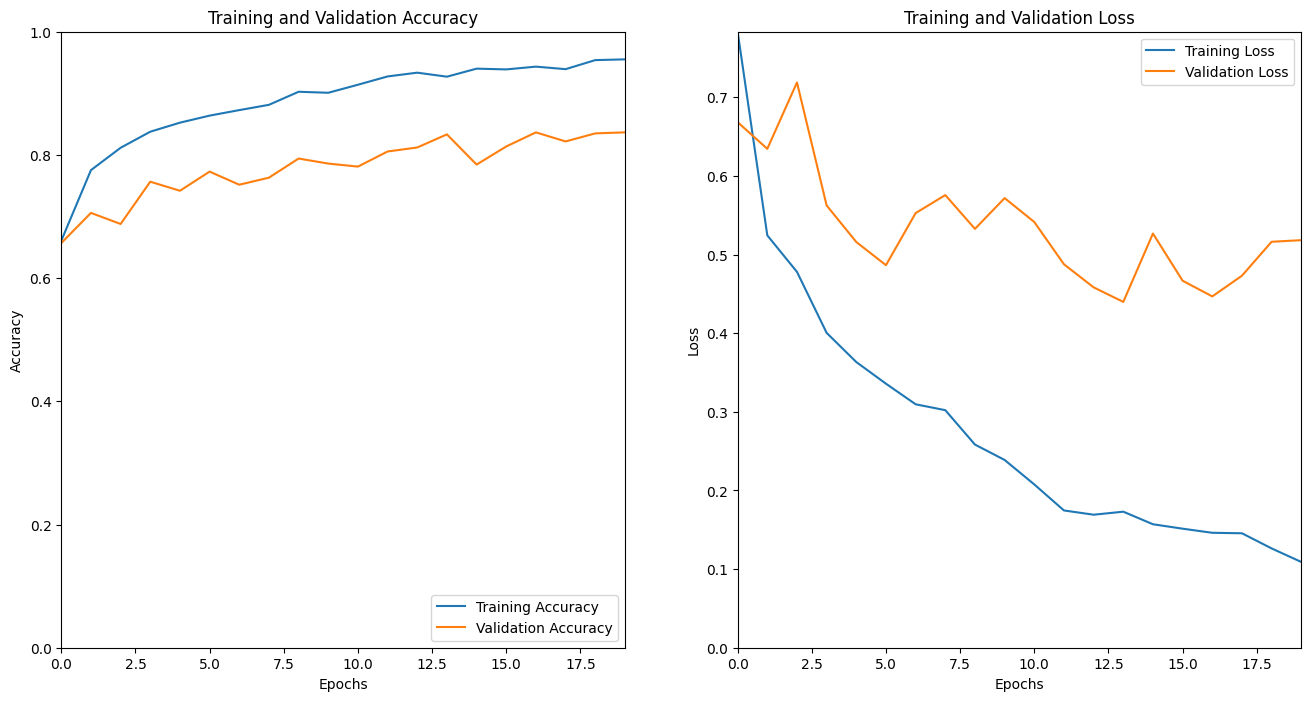

In [34]:
# Evaluate model with test data
loss, acc = model.evaluate(test_data, verbose=2)

print("Accuracy: {:5.2f}%".format(100 * acc))

# Plot accuracy and loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(acc))  # Adjust range according to the number of epochs

plt.figure(figsize=(16, 8))  # Increased figure size for better visualization

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0, len(acc) - 1)
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xlim(0, len(loss) - 1)
plt.ylim(0, max(max(loss), max(val_loss)))  # Adjust y-axis limit to fit the data

plt.show()


In [49]:
model.save("model_brain_tumor_81.h5")

In [45]:
import os
import numpy as np

test_data_count = 100

dir_class_1 = "./brain-tumor/"

list_class = {1: "meningioma", 2: "glioma", 3: "pituitary tumor"}

test_images = {}

for cls in list_class:
    for i in range(test_data_count):
        dir = os.path.join(dir_class_1, str(cls))
        img_name = os.listdir(dir)[i]
        img_path = os.path.join(dir, img_name)
        test_images.update({img_path: list_class[cls]})

result = []
class_names = ["meningioma", "glioma", "pituitary tumor"]

for images in test_images:
    img = image.load_img(images, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    result_predict = model.predict(img)
    result.append(class_names[np.argmax(result_predict[0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━

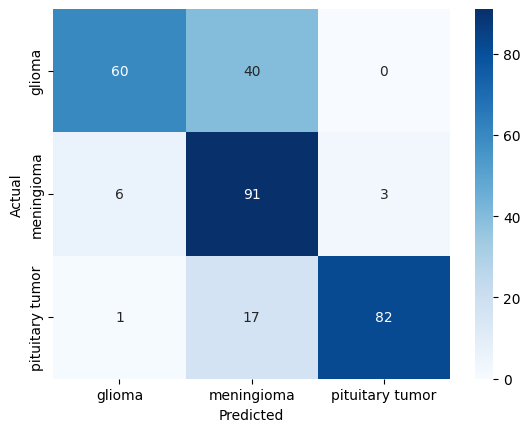

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({"Actual": list(test_images.values()), "Predicted": result})

confusion_matrix = pd.crosstab(
    df["Actual"], df["Predicted"], rownames=["Actual"], colnames=["Predicted"]
)
sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()


## Testing menggunakan model dengan akurasi 80%

In [38]:
from keras.models import load_model
from keras.preprocessing import image
from keras.utils import plot_model

model_79 = load_model('brain_tumor_model.h5')

In [39]:
model_79.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,741 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [50]:
print("Total layers:", len(model_79.layers))

Total layers: 10


In [40]:
loss, acc = model_79.evaluate(test_data, verbose=2)
print("Accuracy: {:5.2f}%".format(100 * acc))

39/39 - 12s - 316ms/step - accuracy: 0.8088 - loss: 0.4432
Accuracy: 80.88%


In [47]:
test_images = {}

for cls in list_class:
    for i in range(test_data_count):
        dir = os.path.join(dir_class_1, str(cls))
        img_name = os.listdir(dir)[i]
        img_path = os.path.join(dir, img_name)
        test_images.update({img_path: list_class[cls]})

result_79 = []
class_names = ["meningioma", "glioma", "pituitary tumor"]

for images in test_images:
    img = image.load_img(images, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    result_predict = model_79.predict(img)
    result_79.append(class_names[np.argmax(result_predict[0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━

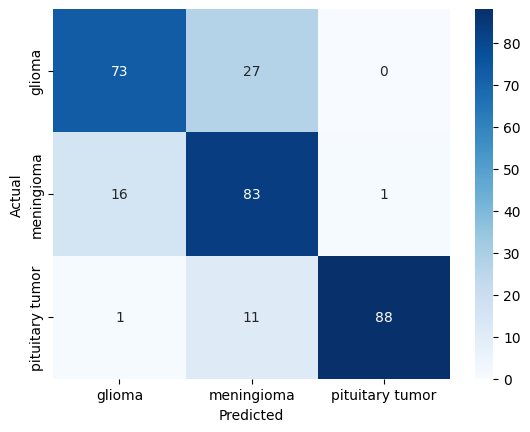

In [48]:
df_model_79 = pd.DataFrame({
    'Actual': list(test_images.values()),
    'Predicted': result_79
})

confusion_matrix = pd.crosstab(df_model_79['Actual'], df_model_79['Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.show()